# House Prices - Advanced Regression Techniques

**Predict sales prices and practice feature engineering, RFs, and gradient boosting**

**MIDS - W207 - Fall Semester 2021 - Team 1**

- Anshuman Awasthi
- Ruilan Liu
- Dante Malagrino
- Viswanathan Thiagarajan

### Introduction

When learning Linear regression, Boston Housing sale price data is the most commonly used dataset. In all the years, many members have tried different feature engineering techniques and models to achieve a lower and lower RMSE. It could be beneficial to new machine learning students, including us, to work with a new alternative house price dataset that has additional predictor variables and feature engineering challenges. We think that Ames, Iowa housing price dataset provides a good opportunity to gain an understanding, and practice regression models in machine learning.

### Inference Problem

The inference problem we are set to solve with this project is the following:

$X \rightarrow Y = f_h(X,\theta)$

where $X$ represents a collection of information (features) about real estate properties, describing several different characteristics of the houses for sale, and $Y$ is the predicted sale price.

### Dataset

The dataset that will be used for building the model is the [Ames Housing dataset](http://www.amstat.org/publications/jse/v19n3/decock.pdf), which was compiled for research purposes as an alternative to the more classic Boston Housing dataset, abundantly used in the past.  This dataset contains over 1400 entries of sales transaction that have taken place in the time period between 2006 and 2010 in Ames, Iowa.  Each entry has 79 explanatory variables (potential features) that describe the properties being sold.

### Model Selection And Performance Evaluation

We plan to use regression to predict the price of a house sold.  We have input variables that need to be used in estimating a continuous output variable, i.e. the sale price.  We will consider various regression models, and for the purpose of our initial evaluation, we will use the basic linear regression.

The model will be evaluated using the Root-Mean-Squared Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sale price.  This is in line with how Kaggle is going to evaluate the performance of our model and should allow for more consistent comparison of results.
As noted on the Kaggle website, the choice of logs implies that errors in predicting expensive houses and cheap houses will affect the result equally.

### Exploratory Data Analysis

We will now take a quick look at the dataset to understand its composition and key elements. First of all, we are importing some required libraries for the analysis.  Then we read, import in Pandas dataframes, and quickly check both the training and test datasets.

In [2]:
%matplotlib inline

import sys
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import time


In [3]:
# Reads the train.csv file into the df_train dataset, so that we can use Pandas for data exploration

df_train = pd.read_csv('train.csv', index_col='Id')
df_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
df_test = pd.read_csv('test.csv', index_col='Id')
df_test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal


In [5]:
# Check the size and shape of the dataset (# of entries times # of features plus one[index])
# There are almost the same number of records in both datasets, while the test data is only missing the target
# labels (i.e. SalePrice)

print (df_train.shape, df_test.shape)

(1460, 80) (1459, 79)


In [6]:
print (f'Range of transactions in the dataset is from {df_train.YrSold.min()} to {df_train.YrSold.max()}')

Range of transactions in the dataset is from 2006 to 2010


In [7]:
# Use describe function from Pandas to get a sense of how features are distributed

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [8]:
# We will now create two separate dataframes from the training dataset to separate the labels from the data

df_labels = (df_train['SalePrice'])
df_data = (df_train.drop('SalePrice', 1))

C:\Users\VISWAN~1\AppData\Local\Temp/ipykernel_4260/2600911598.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_data = (df_train.drop('SalePrice', 1))


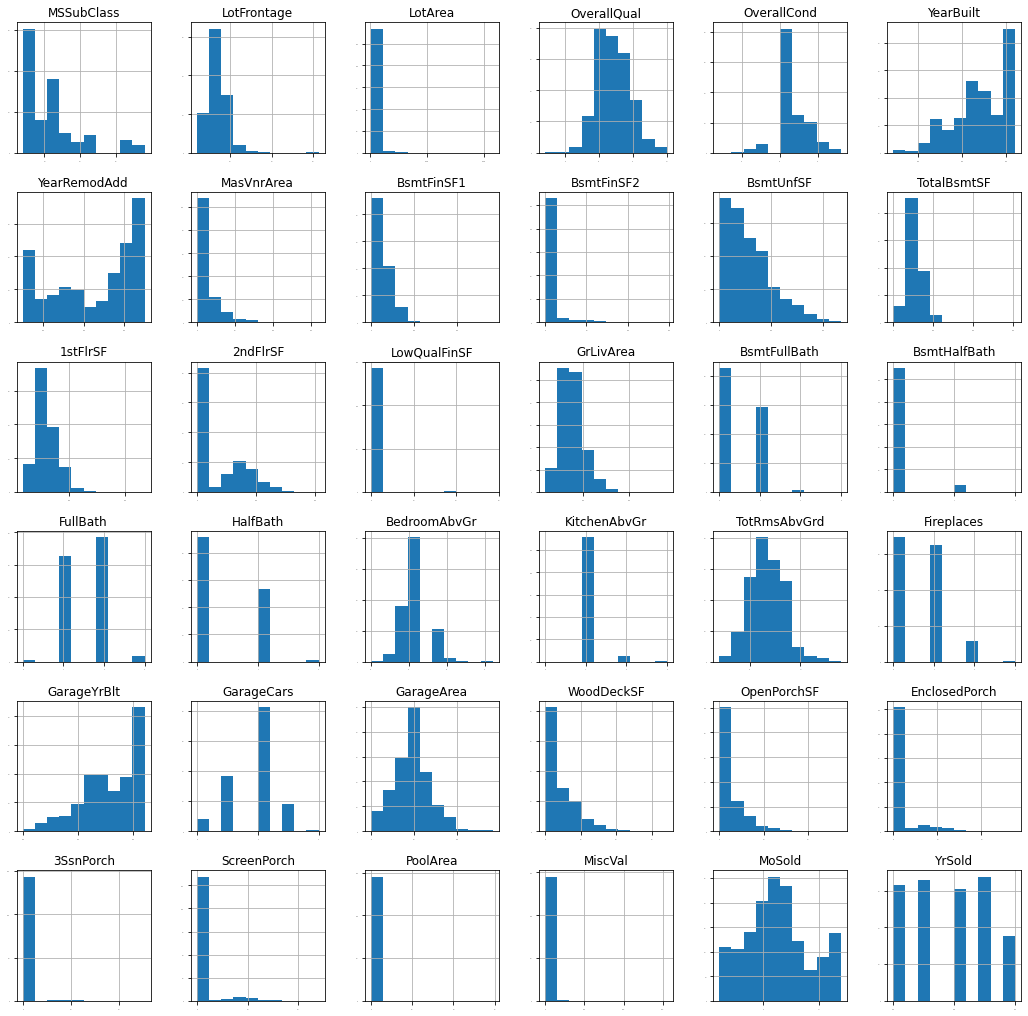

In [9]:
# We now take a look at the distribution of the features

df_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(18,18))
pass

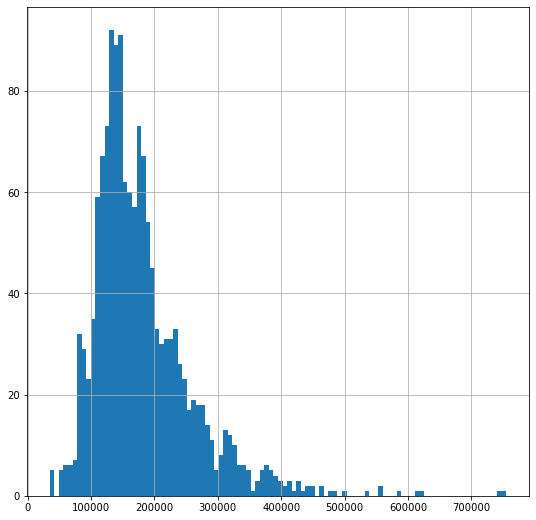

In [11]:
# And here is a look at the distribution of labels

df_labels.hist(figsize=(9,9), bins=100)
pass

In [14]:
# Looking at the outliers above $600K price and SaleCondition as Abnorml

#101 rows
df_train[df_train['SaleCondition']=='Abnorml']

# 4 rows
df_train[df_train['SalePrice']>600000]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


C:\Users\VISWAN~1\AppData\Local\Temp/ipykernel_4260/834025106.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


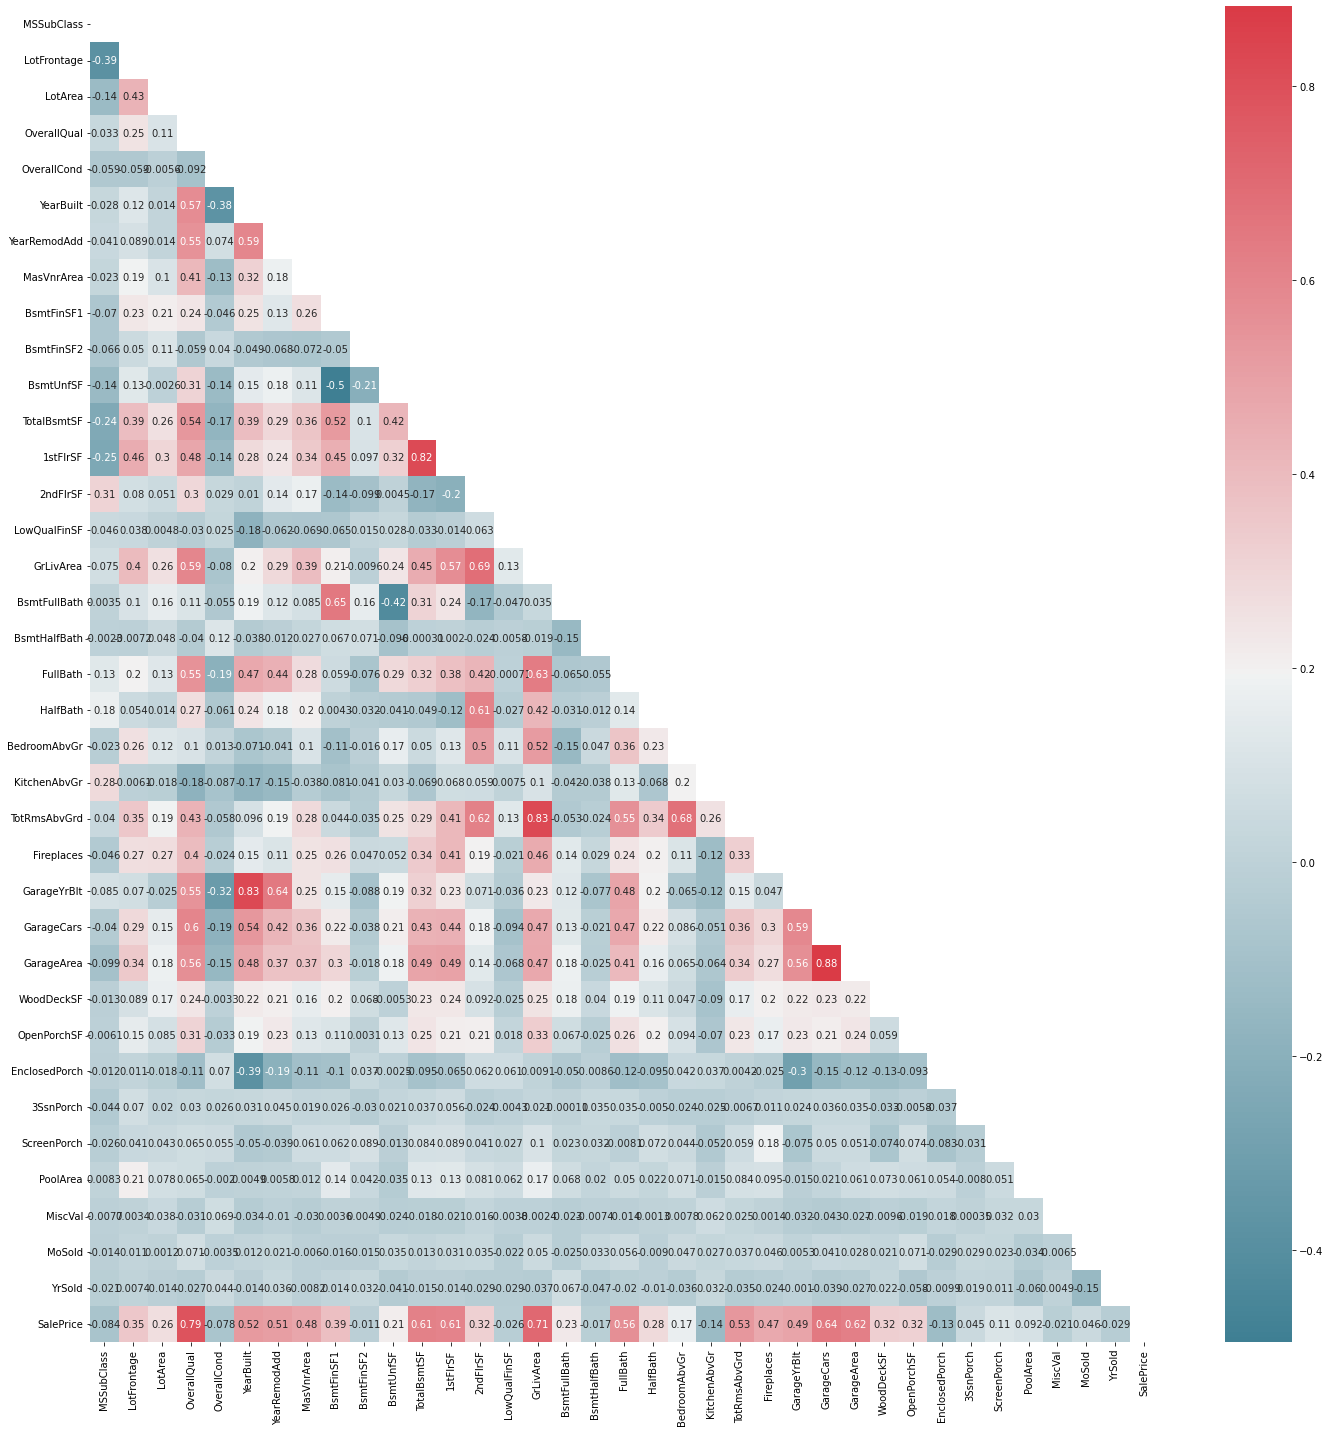

In [15]:
# To get an initial sense of how the various features relate to each other, we will now look at a full
# correlation matrix, including both features and label

corr = df_train.corr()

fig, ax = plt.subplots(figsize=(20, 20))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax)
fig.tight_layout()

### Linear Regression Analysis

In the next few cells, we are going to run the data through a linear regression estimator to get an initial sense of what kind of error we get without applying any significant optimization to the data.

To keep things simple, we are excluding non numeric features from this early analysis (we may add some preprocessing and include them later as a way to optimize the model) and we are using all of those features for the estimation.

In [16]:
n = []
for item in df_train.columns.drop('SalePrice'):
    type = df_train[item].dtype
    if type == 'int64' or type == 'float64':
        n.append(item)
numeric_features = np.asarray(n)
print (numeric_features)

['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold']


In [17]:
df_relevant_features = df_train[numeric_features]
df_relevant_features = df_relevant_features.fillna('0')

In [18]:
np.random.seed(0) # Using this to ensure repeatable results - May remove it before production

df_data_array = np.asarray(df_relevant_features)
df_labels_array = np.asarray(df_labels)

dataset_size = df_data_array.shape[0]

shuffle = np.random.permutation(np.arange(dataset_size))
X, Y = df_data_array[shuffle], df_labels_array[shuffle]

split = int(dataset_size*0.8) # 80/20 split between train and dev data

train_data, train_labels = X[:split], Y[:split]
dev_data, dev_labels = X[split:], Y[split:]

In [19]:
print (train_data.shape, train_labels.shape)
print (dev_data.shape, dev_labels.shape)

(1168, 36) (1168,)
(292, 36) (292,)


In [20]:
df_train_data = pd.DataFrame(train_data)
df_train_labels = pd.DataFrame(train_labels)
df_dev_data = pd.DataFrame(dev_data)
df_dev_labels = pd.DataFrame(dev_labels)

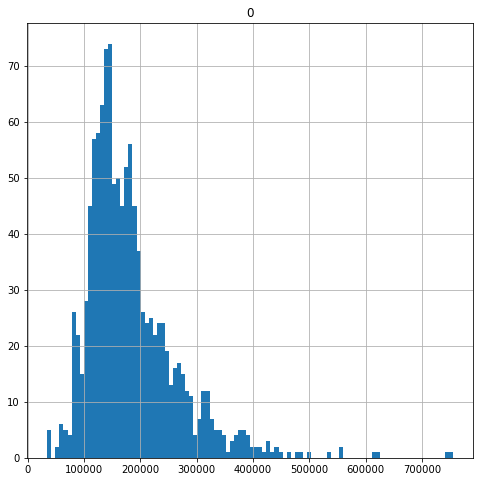

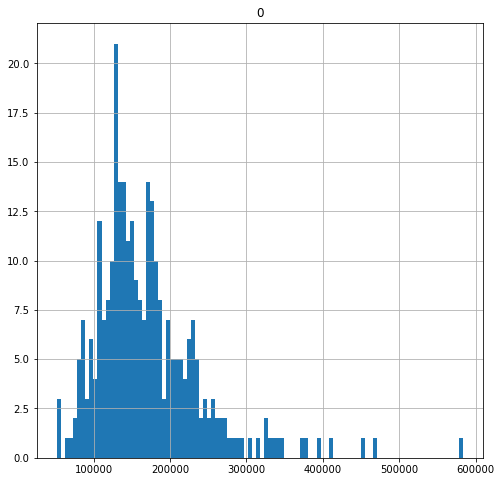

In [21]:
df_train_labels.hist(figsize=(8,8), bins=100)
df_dev_labels.hist(figsize=(8,8), bins=100)
pass

In [22]:
lr = LinearRegression(fit_intercept=True)
lr.fit(train_data, train_labels)
predictions = lr.predict(dev_data)
error_dev = lr.score(dev_data, dev_labels)
error_train = lr.score(train_data,train_labels)

rmse = (mean_squared_error(dev_labels, predictions))**(1/2)
rmse_log = (mean_squared_log_error(dev_labels, predictions))**(1/2)
print (f'R^2 on train data {error_train:.5f}')
print (f'R^2 on dev data {error_dev:.5f}')
print (f'RMSE {rmse:.5f}')
print (f'RMSE_LOG {rmse_log:.5f}')

R^2 on train data 0.81109
R^2 on dev data 0.83453
RMSE 28547.98978
RMSE_LOG 0.16663


### Considerations for Next Steps and Improvement of the Model

In our goal to improve the performance of the model and its ability to generalize, we are planning to try out a few paths, including, among others:

1. Feature Selection: One possible method is to only use features which have a high correlation with Sales Price. Further we can look at omitting features which are highly correlated with features which are already being considered.
2. Check whether it would make sense to remove rows with nulls for required features or impute their values or use some combination of both.
3. We shall also investigate outlier deletion and check its effect on our model.
4. Using required numerical features with appropriate transformations.
5. Use appropriate transformations on skewed features.
6. Hyperparameter tuning: Using L1 penalty for feature selection and L2 penalty in the final model with require C value in each case. 

In [23]:
# get non-numeric cols

c = []
for item in df_train.columns:
    if df_train[item].dtype == 'object':
        c.append(item)
cate_features = np.asarray(c)
print (cate_features)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


In [24]:
df_cate_features = df_train[cate_features]
pd.set_option('display.max_columns', None)
df_cate_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [25]:
# get unique value for each col --> not a necessary step, just to keep the code for future reference

uni_val = {}
for i in df_cate_features.columns:
    uni_val[i] = list(pd.unique(df_cate_features[i]))


In [26]:
# convert to code and get mapping

df_code = df_cate_features.copy(deep=True)
cate = {}

for i in df_cate_features.columns:
    df_code.loc[:,i] = df_cate_features.loc[:,i].astype('category').cat.codes
    cate[i] = dict(enumerate(df_cate_features.loc[:,i].astype('category').cat.categories))


cate


{'MSZoning': {0: 'C (all)', 1: 'FV', 2: 'RH', 3: 'RL', 4: 'RM'},
 'Street': {0: 'Grvl', 1: 'Pave'},
 'Alley': {0: 'Grvl', 1: 'Pave'},
 'LotShape': {0: 'IR1', 1: 'IR2', 2: 'IR3', 3: 'Reg'},
 'LandContour': {0: 'Bnk', 1: 'HLS', 2: 'Low', 3: 'Lvl'},
 'Utilities': {0: 'AllPub', 1: 'NoSeWa'},
 'LotConfig': {0: 'Corner', 1: 'CulDSac', 2: 'FR2', 3: 'FR3', 4: 'Inside'},
 'LandSlope': {0: 'Gtl', 1: 'Mod', 2: 'Sev'},
 'Neighborhood': {0: 'Blmngtn',
  1: 'Blueste',
  2: 'BrDale',
  3: 'BrkSide',
  4: 'ClearCr',
  5: 'CollgCr',
  6: 'Crawfor',
  7: 'Edwards',
  8: 'Gilbert',
  9: 'IDOTRR',
  10: 'MeadowV',
  11: 'Mitchel',
  12: 'NAmes',
  13: 'NPkVill',
  14: 'NWAmes',
  15: 'NoRidge',
  16: 'NridgHt',
  17: 'OldTown',
  18: 'SWISU',
  19: 'Sawyer',
  20: 'SawyerW',
  21: 'Somerst',
  22: 'StoneBr',
  23: 'Timber',
  24: 'Veenker'},
 'Condition1': {0: 'Artery',
  1: 'Feedr',
  2: 'Norm',
  3: 'PosA',
  4: 'PosN',
  5: 'RRAe',
  6: 'RRAn',
  7: 'RRNe',
  8: 'RRNn'},
 'Condition2': {0: 'Artery',
  

In [27]:
df_code.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,-1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,-1,1,1,4,4,2,-1,-1,-1,8,4
2,3,1,-1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,-1,-1,-1,8,4
3,3,1,-1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,-1,-1,-1,8,4
4,3,1,-1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,-1,-1,-1,8,0
5,3,1,-1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,-1,-1,-1,8,4


In [28]:
def encoded(df):
  for item in df.columns:
    if df[item].dtype == 'object':
      df.loc[:,item] = df.loc[:,i].astype('category').cat.codes
  return df

df_train_encoded=encoded(df_train.copy())
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
df_train_encoded.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,4,4,4,4,4,4,4,4,4,4,4,4,7,5,2003,2003,4,4,4,4,4,196.0,4,4,4,4,4,4,4,706,4,0,150,856,4,4,4,4,856,854,0,1710,1,0,2,1,3,1,4,8,4,0,4,4,2003.0,4,2,548,4,4,4,0,61,0,0,0,0,4,4,4,0,2,2008,4,4,208500
2,20,4,80.0,9600,4,4,4,4,4,4,4,4,4,4,4,4,6,8,1976,1976,4,4,4,4,4,0.0,4,4,4,4,4,4,4,978,4,0,284,1262,4,4,4,4,1262,0,0,1262,0,1,2,0,3,1,4,6,4,1,4,4,1976.0,4,2,460,4,4,4,298,0,0,0,0,0,4,4,4,0,5,2007,4,4,181500
3,60,4,68.0,11250,4,4,4,4,4,4,4,4,4,4,4,4,7,5,2001,2002,4,4,4,4,4,162.0,4,4,4,4,4,4,4,486,4,0,434,920,4,4,4,4,920,866,0,1786,1,0,2,1,3,1,4,6,4,1,4,4,2001.0,4,2,608,4,4,4,0,42,0,0,0,0,4,4,4,0,9,2008,4,4,223500
4,70,0,60.0,9550,0,0,0,0,0,0,0,0,0,0,0,0,7,5,1915,1970,0,0,0,0,0,0.0,0,0,0,0,0,0,0,216,0,0,540,756,0,0,0,0,961,756,0,1717,1,0,1,0,3,1,0,7,0,1,0,0,1998.0,0,3,642,0,0,0,0,35,272,0,0,0,0,0,0,0,2,2006,0,0,140000
5,60,4,84.0,14260,4,4,4,4,4,4,4,4,4,4,4,4,8,5,2000,2000,4,4,4,4,4,350.0,4,4,4,4,4,4,4,655,4,0,490,1145,4,4,4,4,1145,1053,0,2198,1,0,2,1,4,1,4,9,4,1,4,4,2000.0,4,3,836,4,4,4,192,84,0,0,0,0,4,4,4,0,12,2008,4,4,250000


In [30]:
df_nulls=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
df_nulls_percent=pd.concat([df_nulls,percent],axis=1,keys=['NullCount','PercentNullCount'])
df_nulls_percent[df_nulls_percent.NullCount>0]#.head(20)

,NullCount,PercentNullCount
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [31]:
df_train_imputed=df_train.copy()

In [32]:
#according to datadescription when there is no pool it is filled with NA. We shall fill the same with -1. 
df_train_imputed['PoolQC']=df_train_imputed['PoolQC'].fillna(-1)
df_train_imputed['PoolQC'].isnull().sum()

0

In [33]:
#for misc features i think one-hot encoding may be a better approach, as the value describes the presence of a certain feature
#other encoding may also be helpful to map using both training and test data (or if explicitly provided in the data description) to increasing/decreasing digits.
#that way the digits can correspond to certain levels. I'm guessing that will help create a better model. 


In [34]:
##according to datadescription when there is no alley access it is filled with NA. We shall fill the same with -1. 
df_train_imputed['Alley']=df_train_imputed['Alley'].fillna(-1)
df_train_imputed['Alley'].isnull().sum()

0

In [35]:
#for fence we can divide into privacy and woodtypeand fill NA with -1
df_train_imputed['Fence']=df_train_imputed['Fence'].fillna(-1)
df_train_imputed['Fence'].isnull().sum()

0

In [36]:
##according to datadescription when there is no fireplace access it is filled with NA. We shall fill the same with -1. 
df_train_imputed['FireplaceQu']=df_train_imputed['FireplaceQu'].fillna(-1)
df_train_imputed['FireplaceQu'].isnull().sum()

0

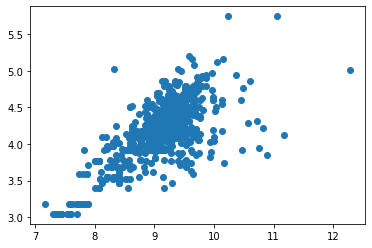

In [38]:
#lotfrontage predicted by lotarea
df_train_imputed['LogLF']=np.log(df_train_imputed['LotFrontage'])
df_train_imputed['LogLA']=np.log(df_train_imputed['LotArea'])
plt.scatter(df_train_imputed['LogLA'],df_train_imputed['LogLF'])

In [39]:
#relationship looks linear
lf_nulls=df_train_imputed.isnull()['LotFrontage']
lf_filled=df_train_imputed.notnull()['LotFrontage']
lf_train_data=df_train_imputed[lf_filled]['LogLA']
lf_train_labels=df_train_imputed[lf_filled]['LogLF']
lf_predict_data=df_train_imputed[lf_nulls]['LogLA']

lf_lr=LinearRegression(fit_intercept=True)
lf_lr.fit(np.array(lf_train_data).reshape(-1,1),np.array(lf_train_labels))
lf_lr.score(np.array(lf_train_data).reshape(-1,1),np.array(lf_train_labels))

0.5558449374334614

In [43]:
from xgboost import XGBRegressor
model = XGBRegressor(n_jobs = -1)
model.fit(np.array(lf_train_data).reshape(-1,1),np.array(lf_train_labels))
model.score(np.array(lf_train_data).reshape(-1,1),np.array(lf_train_labels))

0.8972061432694934

In [44]:
#Scores are not very high (although much better with xgboost)
#also wondering that if we are predicting through another attribute can that be sufficient for our final LR
#in which case we can ignore this
#else we can use the mean by neighbourhood
#if the accuracy is still not good we can try a general mean 

In [45]:
#garagetype can be a one hot encoding as values do not determine levels per se, but existence of a certain type
df_train_imputed['GarageCond']=df_train_imputed['GarageCond'].fillna(-1)
df_train_imputed['GarageCond'].isnull().sum()
df_train_imputed['GarageFinish']=df_train_imputed['GarageFinish'].fillna(-1)
df_train_imputed['GarageFinish'].isnull().sum()
df_train_imputed['GarageQual']=df_train_imputed['GarageQual'].fillna(-1)
df_train_imputed['GarageQual'].isnull().sum()

0

In [46]:
#garage yr built when null can be assumed to be same year as house built
#while performing regresion we may want to take number of years instead of actual year as the feature
#can possibly do this only for rows where above features are not -1 (else -1)
gr_built_nulls=df_train_imputed[df_train_imputed['GarageYrBlt'].isnull()]
gr_built_nulls['GarageYrBlt']=gr_built_nulls['YearBuilt']
df_train_imputed[df_train_imputed['GarageYrBlt'].isnull()]=gr_built_nulls

missing_values = df_train_imputed.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

C:\Users\VISWAN~1\AppData\Local\Temp/ipykernel_4260/2975161121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_built_nulls['GarageYrBlt']=gr_built_nulls['YearBuilt']


MiscFeature     1406
LotFrontage      259
LogLF            259
GarageType        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64

In [47]:
#BsmtFinType1 and BsmtFinType2 can be done via one hot encoding      
df_train_imputed['BsmtExposure']=df_train_imputed['BsmtExposure'].fillna(-1)
df_train_imputed['BsmtExposure'].isnull().sum()    
df_train_imputed['BsmtCond']=df_train_imputed['BsmtCond'].fillna(-1)
df_train_imputed['BsmtCond'].isnull().sum()    
df_train_imputed['BsmtQual']=df_train_imputed['BsmtQual'].fillna(-1)
df_train_imputed['BsmtQual'].isnull().sum()

0

In [48]:
df_train_imputed[df_train_imputed['MasVnrArea'].isnull()][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
Id,,
235,NaN,NaN
530,NaN,NaN
651,NaN,NaN
937,NaN,NaN
974,NaN,NaN
978,NaN,NaN
1244,NaN,NaN
1279,NaN,NaN


In [49]:
#assume doesn't exist
df_train_imputed['MasVnrArea']=df_train_imputed['MasVnrArea'].fillna(0)
df_train_imputed['MasVnrArea'].isnull().sum()
df_train_imputed['MasVnrType']=df_train_imputed['MasVnrType'].fillna(-1)
df_train_imputed['MasVnrType'].isnull().sum()

0

In [50]:
#as electrical is just one row, we can drop it. 
missing_values = df_train_imputed.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)
#adding notes from above
#BsmtFinType1 and BsmtFinType2 can be done via one hot encoding
#garagetype can be a one hot encoding as values do not determine levels per se, but existence of a certain type

#LotFrontage predicted by LotArea
#Scores are not very high (although much better with xgboost)
#also wondering that if we are predicting through another attribute can that be sufficient for our final LR
#in which case we can ignore this
#else we can use the mean by neighbourhood
#if the accuracy is still not good we can try a general mean 

#for misc features i think one-hot encoding may be a better approach, as the value describes the presence of a certain feature

MiscFeature     1406
LotFrontage      259
LogLF            259
GarageType        81
BsmtFinType2      38
BsmtFinType1      37
Electrical         1
dtype: int64

In [51]:
len(numeric_features)

36

**Outlier Detection**

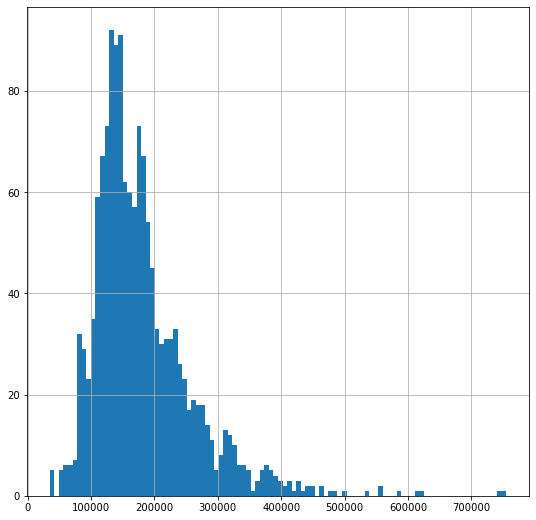

In [52]:
# And here is a look at the distribution of labels

df_labels.hist(figsize=(9,9), bins=100)
pass

In [53]:
df_train_ouliers_handled=df_train_imputed.copy()
#let's remove the sale price greater than 700k
df_train_ouliers_handled = df_train_ouliers_handled.drop(df_train_ouliers_handled[(df_train_ouliers_handled.SalePrice >= 700000)].index)

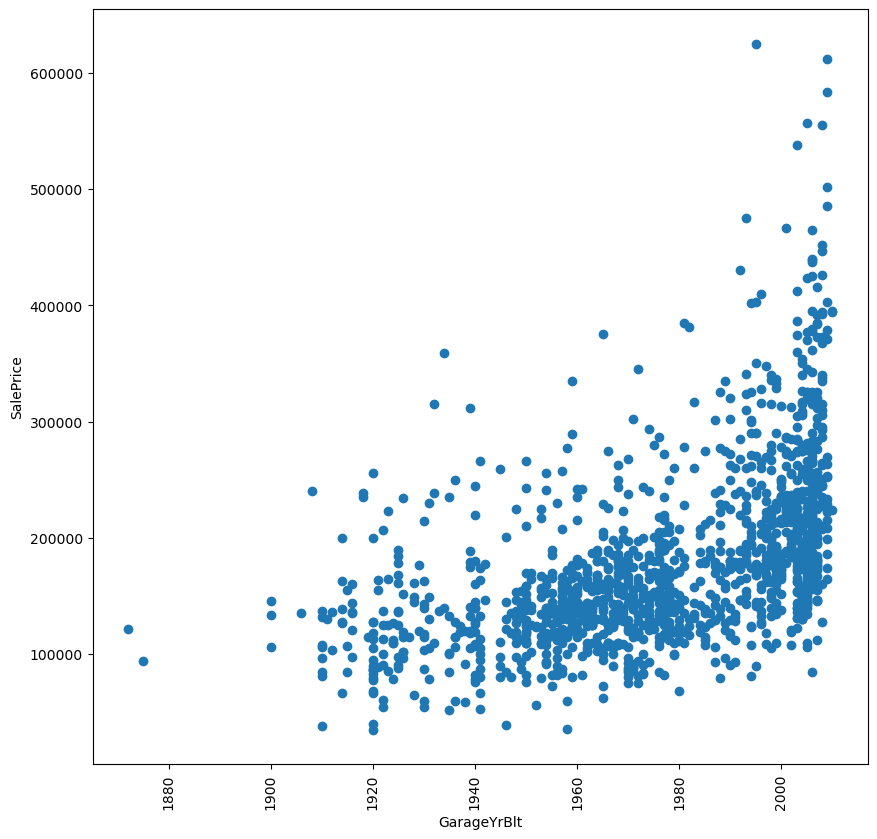

In [54]:
#numerical
feature='GarageYrBlt'
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_train_ouliers_handled[feature], df_train_ouliers_handled['SalePrice'])
plt.xlabel(feature)
plt.xticks(rotation=90)
plt.ylabel('SalePrice')
plt.show()

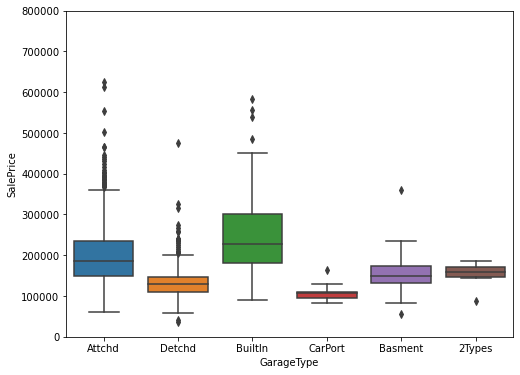

In [55]:
#categorical
var = 'GarageType'
data = pd.concat([df_train_ouliers_handled['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [57]:
#from the above distribution
df_train_ouliers_handled = df_train_ouliers_handled.drop(df_train_ouliers_handled[(df_train_ouliers_handled['1stFlrSF'] >= 4000)].index)
df_train_ouliers_handled = df_train_ouliers_handled.drop(df_train_ouliers_handled[(df_train_ouliers_handled.GrLivArea >= 4000)].index)

#not filtering bedroomabovegr and kitchenabovegr, as they maybe genuine values, and the distribution is following th expected trend.

#surprising thing about TotRmsAbvGrd -> in general price increases with increase in number of rooms
# but when this value=12, the price suddenly drops?
#filtering out above 12 as only one such row, but what should we do about 12?
df_train_ouliers_handled = df_train_ouliers_handled.drop(df_train_ouliers_handled[(df_train_ouliers_handled.TotRmsAbvGrd >12)].index)

#although the pre 1880 garage built looks like an outlier
#thinking of keeping it as it doesnot affect the trend with sale price.

In [68]:
# Looking at the distribution of sales price and columns 20 to 40
df_train_2040 = df_train.iloc[:, np.r_[20:40,79]]
df_train_2040

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,208500
2,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,181500
3,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,223500
4,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,140000
5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,175000
1457,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,210000
1458,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,266500


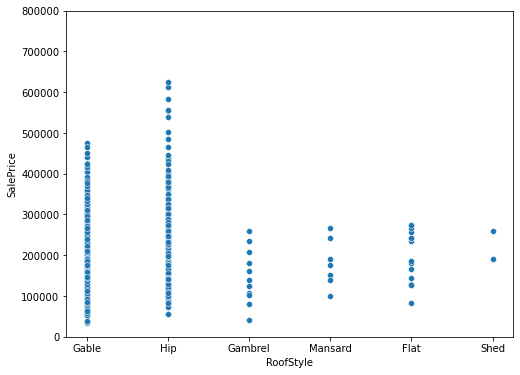

In [131]:
#Looks like Gable and Hip are the one with most values
var = 'RoofStyle'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

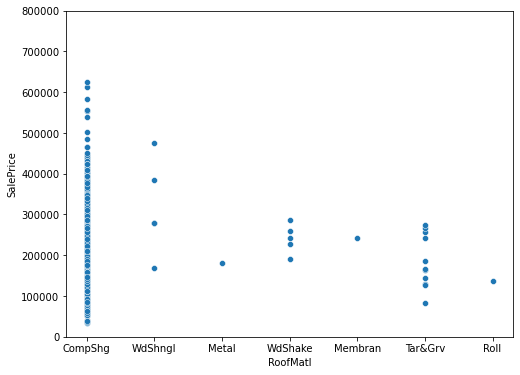

In [130]:
#Looks like CompShg has the most values
var = 'RoofMatl'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

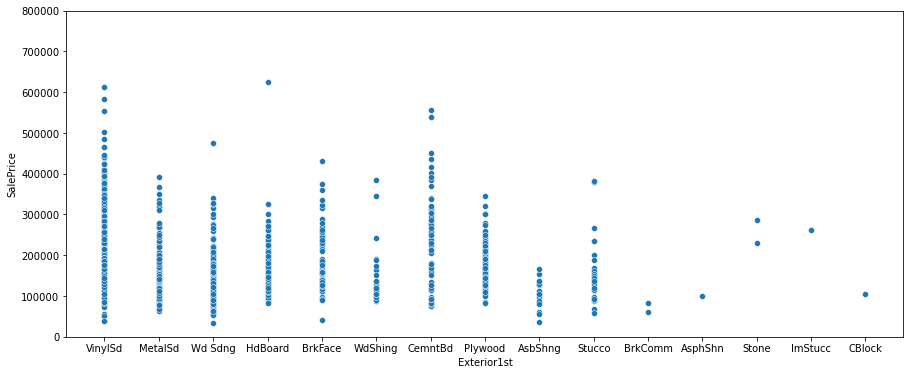

In [129]:
# No clear correlation as most are in similar range
var = 'Exterior1st'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.scatterplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

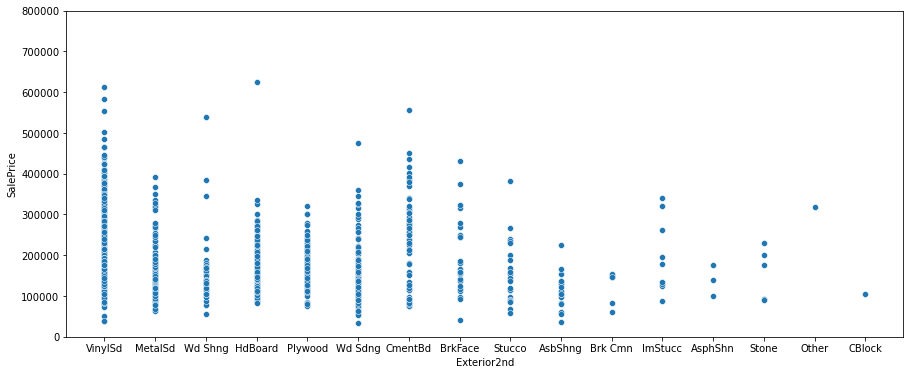

In [128]:
# No clear correlation as most are in similar range
var = 'Exterior2nd'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.scatterplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

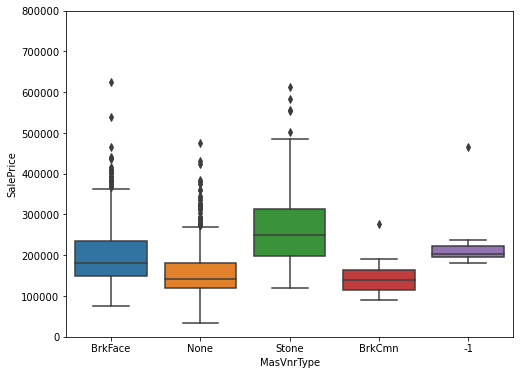

In [127]:
# Masonry type has some correlation with price
var = 'MasVnrType'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

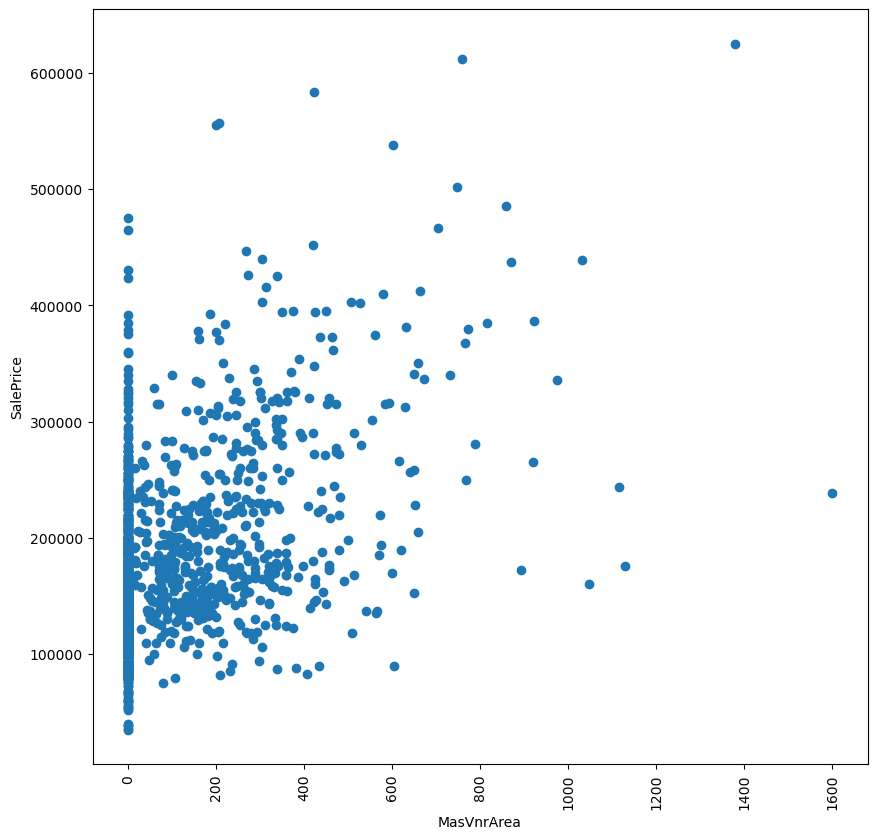

In [79]:
#Masonry Vineer area does not seem to impact the price directly but we may have to see how it impacts 
# price when masonry type is brick or stone
feature='MasVnrArea'
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_train_ouliers_handled[feature], df_train_ouliers_handled['SalePrice'])
plt.xlabel(feature)
plt.xticks(rotation=90)
plt.ylabel('SalePrice')
plt.show()

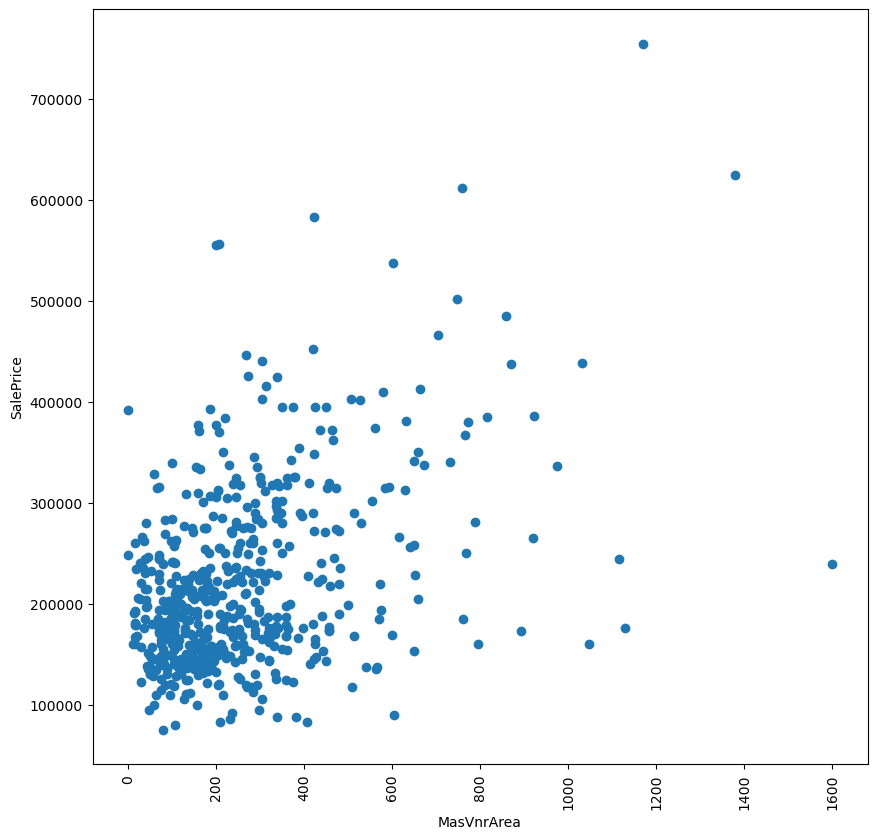

In [106]:
# Checking only on the rows with a brick or snone face and we see some correlation of price with masonry vineer area

df_train_mvt = df_train_2040[(df_train_2040['MasVnrType'] =='Stone') | (df_train_2040['MasVnrType'] =='BrkFace')]

feature='MasVnrArea'
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_train_mvt[feature], df_train_mvt['SalePrice'])
plt.xlabel(feature)
plt.xticks(rotation=90)
plt.ylabel('SalePrice')
plt.show()

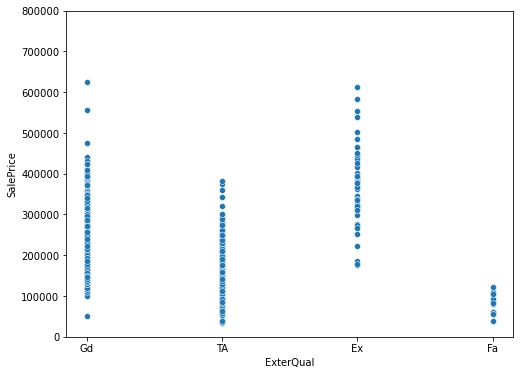

In [124]:
#Looks this feature has some correlation with price
var = 'ExterQual'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

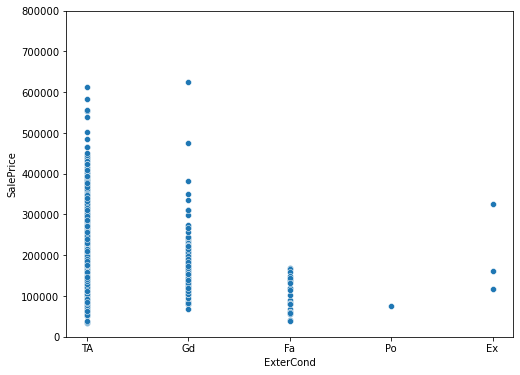

In [123]:
#Looks this feature has some correlation with price
var = 'ExterCond'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

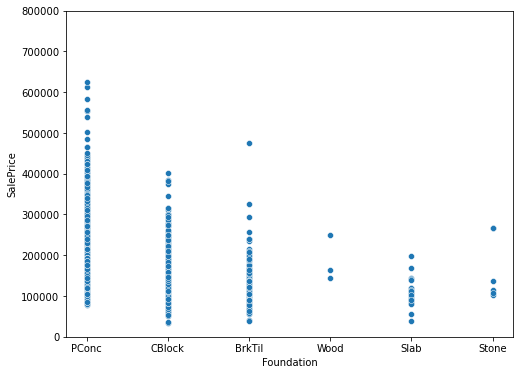

In [122]:
#Looks this feature has some correlation with price
var = 'Foundation'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

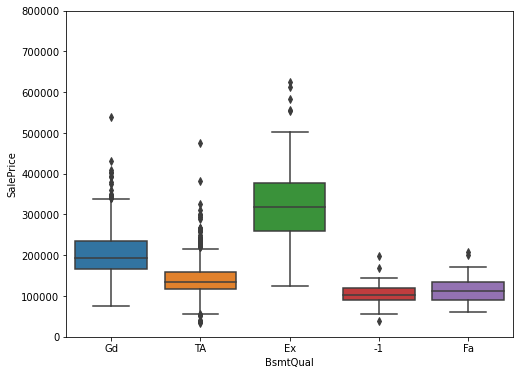

In [84]:
#Looks this feature has some correlation with price
var = 'BsmtQual'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

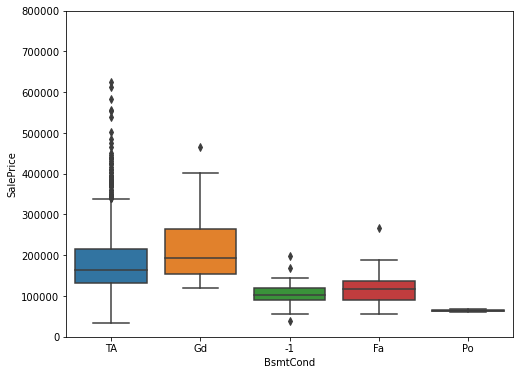

In [121]:
#Looks this feature has some correlation with price
var = 'BsmtCond'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

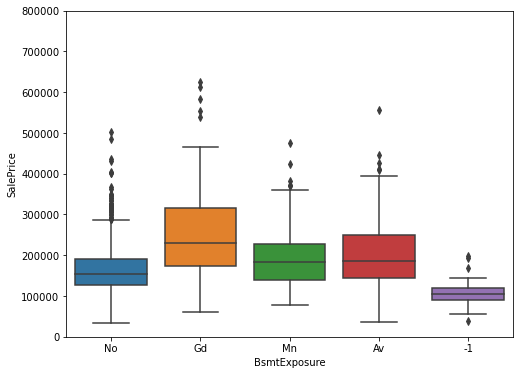

In [119]:
#Looks this feature has some correlation with price
var = 'BsmtExposure'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

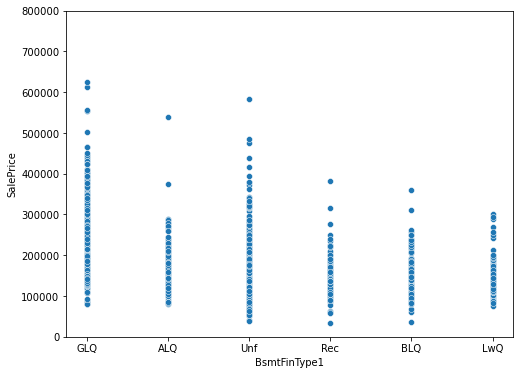

In [115]:
#Looks this feature has some correlation with price
var = 'BsmtFinType1'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

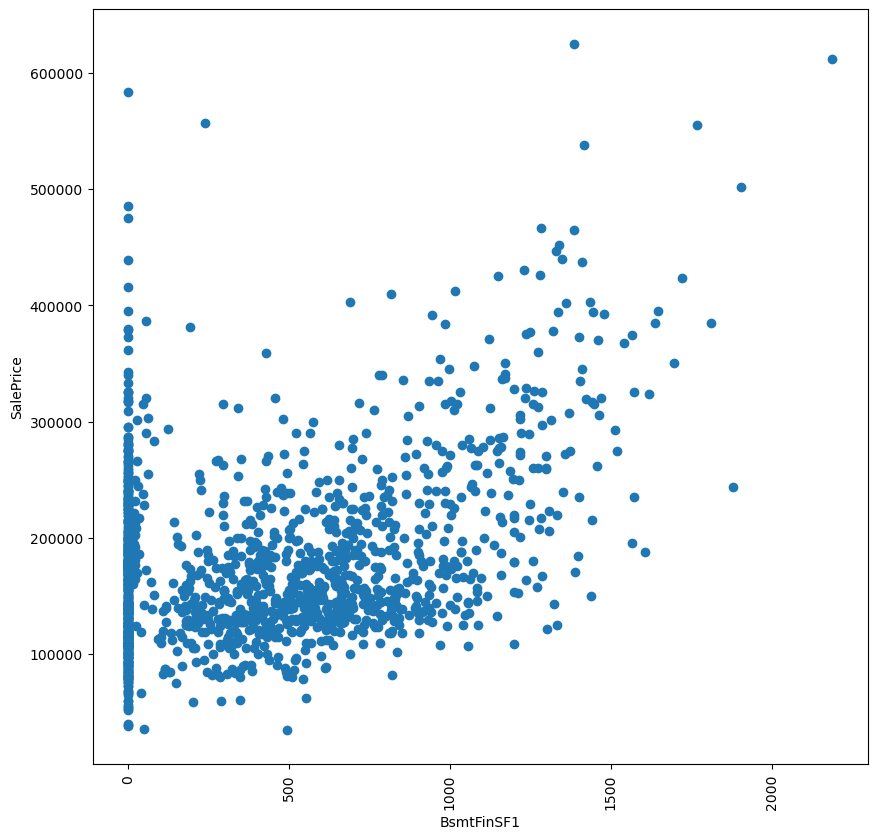

In [89]:
#Looks this feature has some correlation with price when there is a basement with type 1 finish
feature='BsmtFinSF1'
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_train_ouliers_handled[feature], df_train_ouliers_handled['SalePrice'])
plt.xlabel(feature)
plt.xticks(rotation=90)
plt.ylabel('SalePrice')
plt.show()

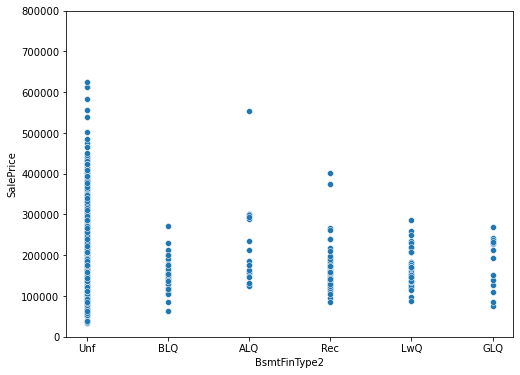

In [114]:
#Looks this feature has some correlation with price
var = 'BsmtFinType2'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

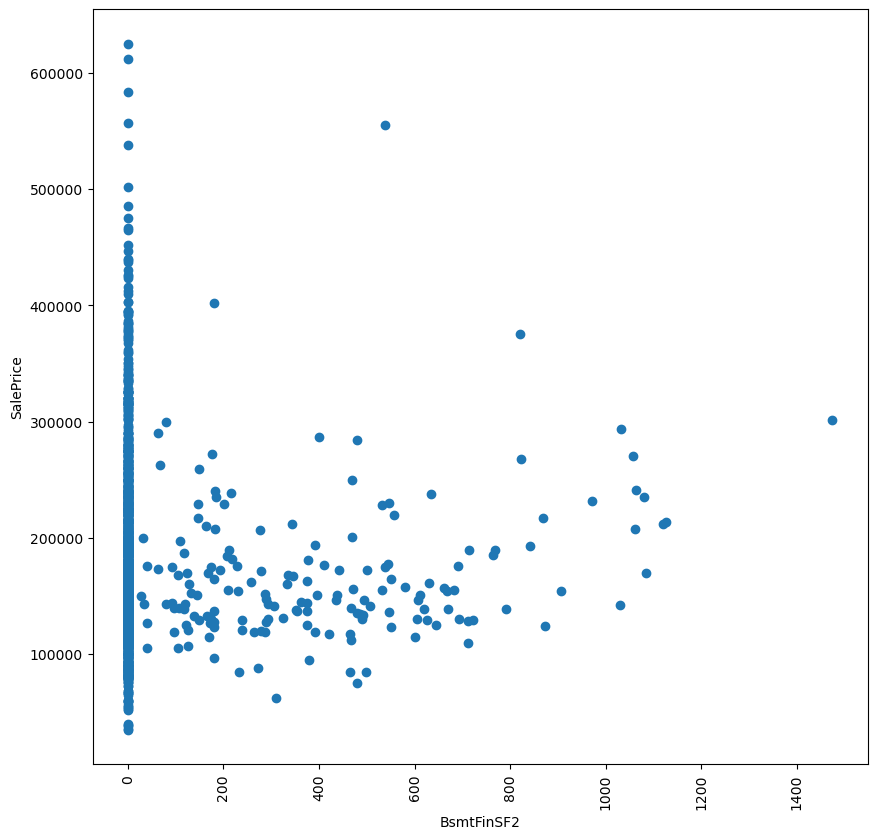

In [90]:
#Looks this feature has some correlation with price when there is a basement with type 2 finish
feature='BsmtFinSF2'
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_train_ouliers_handled[feature], df_train_ouliers_handled['SalePrice'])
plt.xlabel(feature)
plt.xticks(rotation=90)
plt.ylabel('SalePrice')
plt.show()

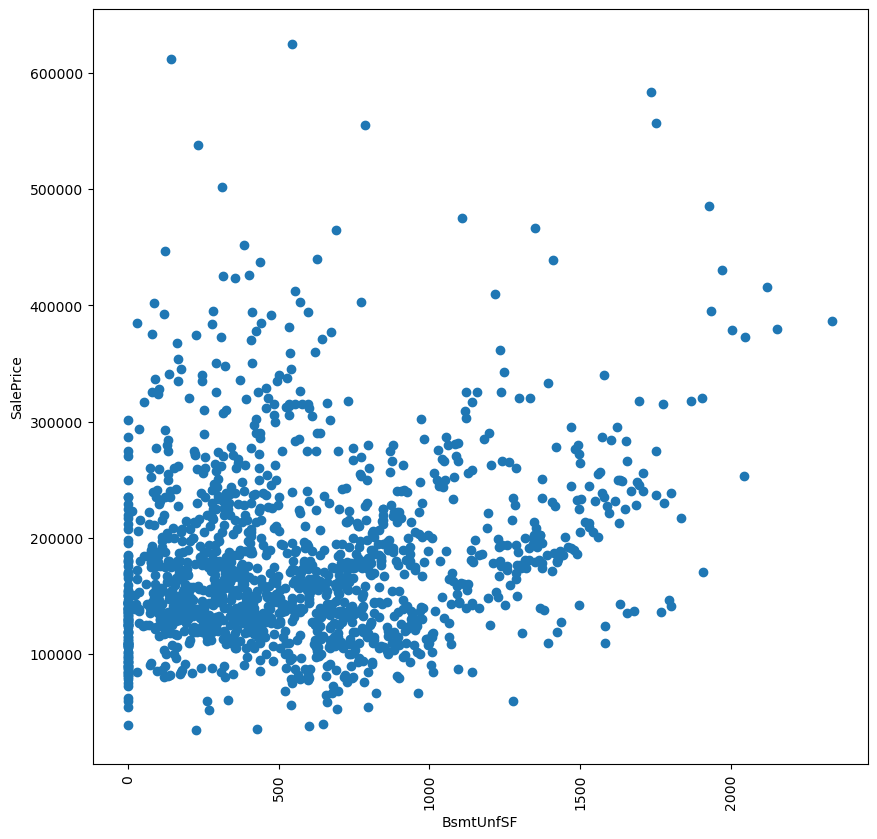

In [91]:
#Looks this feature has weak correlation with price when there is a basement is unfinished
feature='BsmtUnfSF'
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_train_ouliers_handled[feature], df_train_ouliers_handled['SalePrice'])
plt.xlabel(feature)
plt.xticks(rotation=90)
plt.ylabel('SalePrice')
plt.show()

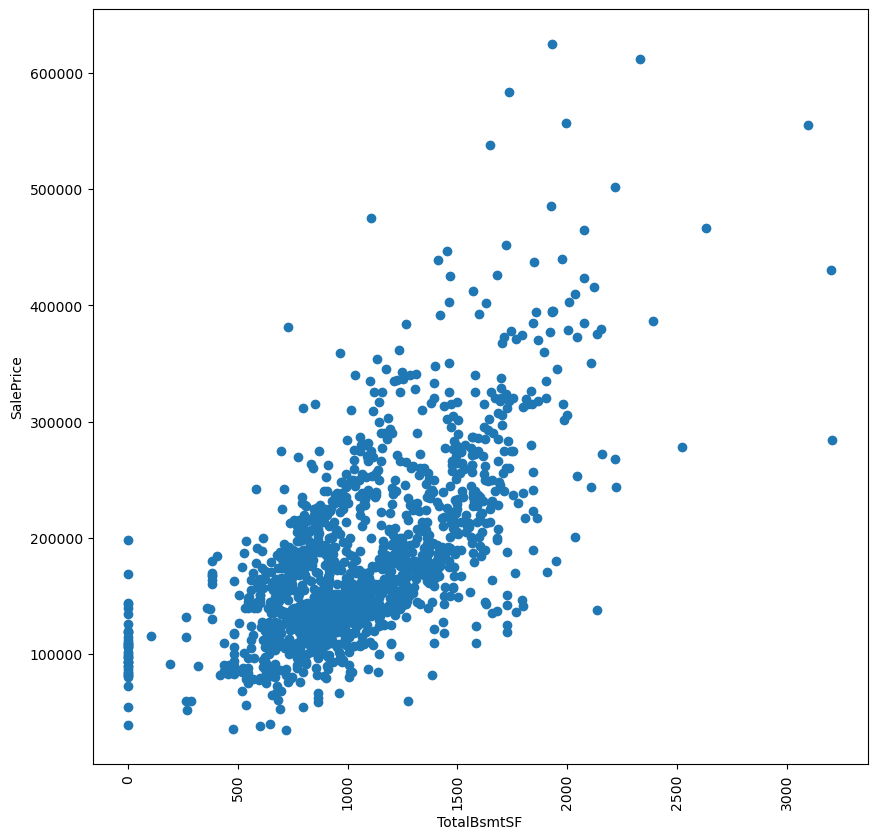

In [92]:
#Looks this feature has strong correlation with price 
feature='TotalBsmtSF'
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_train_ouliers_handled[feature], df_train_ouliers_handled['SalePrice'])
plt.xlabel(feature)
plt.xticks(rotation=90)
plt.ylabel('SalePrice')
plt.show()

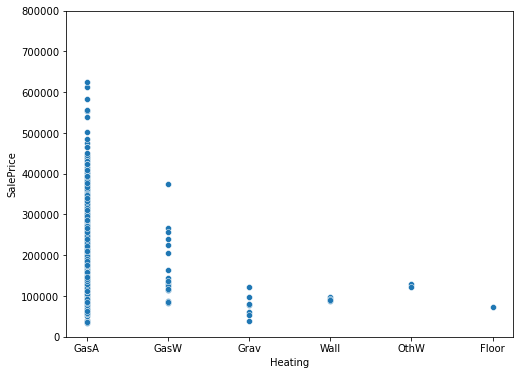

In [113]:
#Most of the values are GasA, need to check if we can remove the feature from analysis
var = 'Heating'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

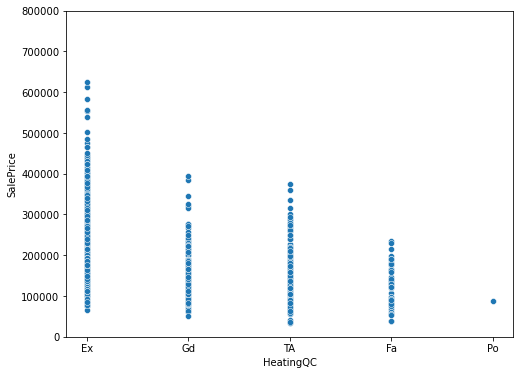

In [112]:
#Looks this feature has some correlation with price 
var = 'HeatingQC'
data = pd.concat([df_train_2040['SalePrice'], df_train_ouliers_handled[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [110]:
df_test[df_test['SaleCondition']=='Abnorml']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1493,20,RL,39.0,15410,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRNe,Norm,1Fam,1Story,6,6,1974,2002,Hip,CompShg,Plywood,Plywood,BrkCmn,250.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,126.0,GLQ,859.0,223.0,1208.0,GasA,Ex,Y,SBrkr,1494,0,0,1494,1.0,0.0,2,0,3,1,TA,7,Typ,2,Fa,Attchd,1974.0,Fin,2.0,461.0,TA,TA,Y,296,0,186,0,0,0,NaN,GdPrv,NaN,0,4,2010,WD,Abnorml
1514,90,RL,98.0,13260,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,TA,TA,CBlock,TA,TA,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2010,Oth,Abnorml
1526,190,RL,70.0,13587,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,2fmCon,1Story,5,5,1958,1958,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Av,Rec,532.0,Unf,0.0,456.0,988.0,GasA,TA,Y,SBrkr,988,0,0,988,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,Unf,1.0,264.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Abnorml
1531,50,RM,60.0,4800,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,4,5,1900,1954,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,771.0,TA,TA,PConc,TA,TA,No,ALQ,48.0,Unf,0.0,661.0,709.0,GasA,TA,Y,SBrkr,1157,687,0,1844,1.0,0.0,1,0,3,1,TA,9,Min2,2,Gd,Basment,1900.0,Unf,1.0,240.0,TA,TA,Y,84,0,0,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Abnorml
1537,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,832,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.0,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml
2893,190,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,5,6,1951,1951,Gable,CompShg,WdShing,Wd Shng,None,0.0,Fa,Fa,CBlock,TA,TA,Mn,Unf,0.0,Unf,0.0,660.0,660.0,GasA,TA,N,SBrkr,1060,336,0,1396,0.0,0.0,2,0,4,2,TA,8,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml
2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml
